In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


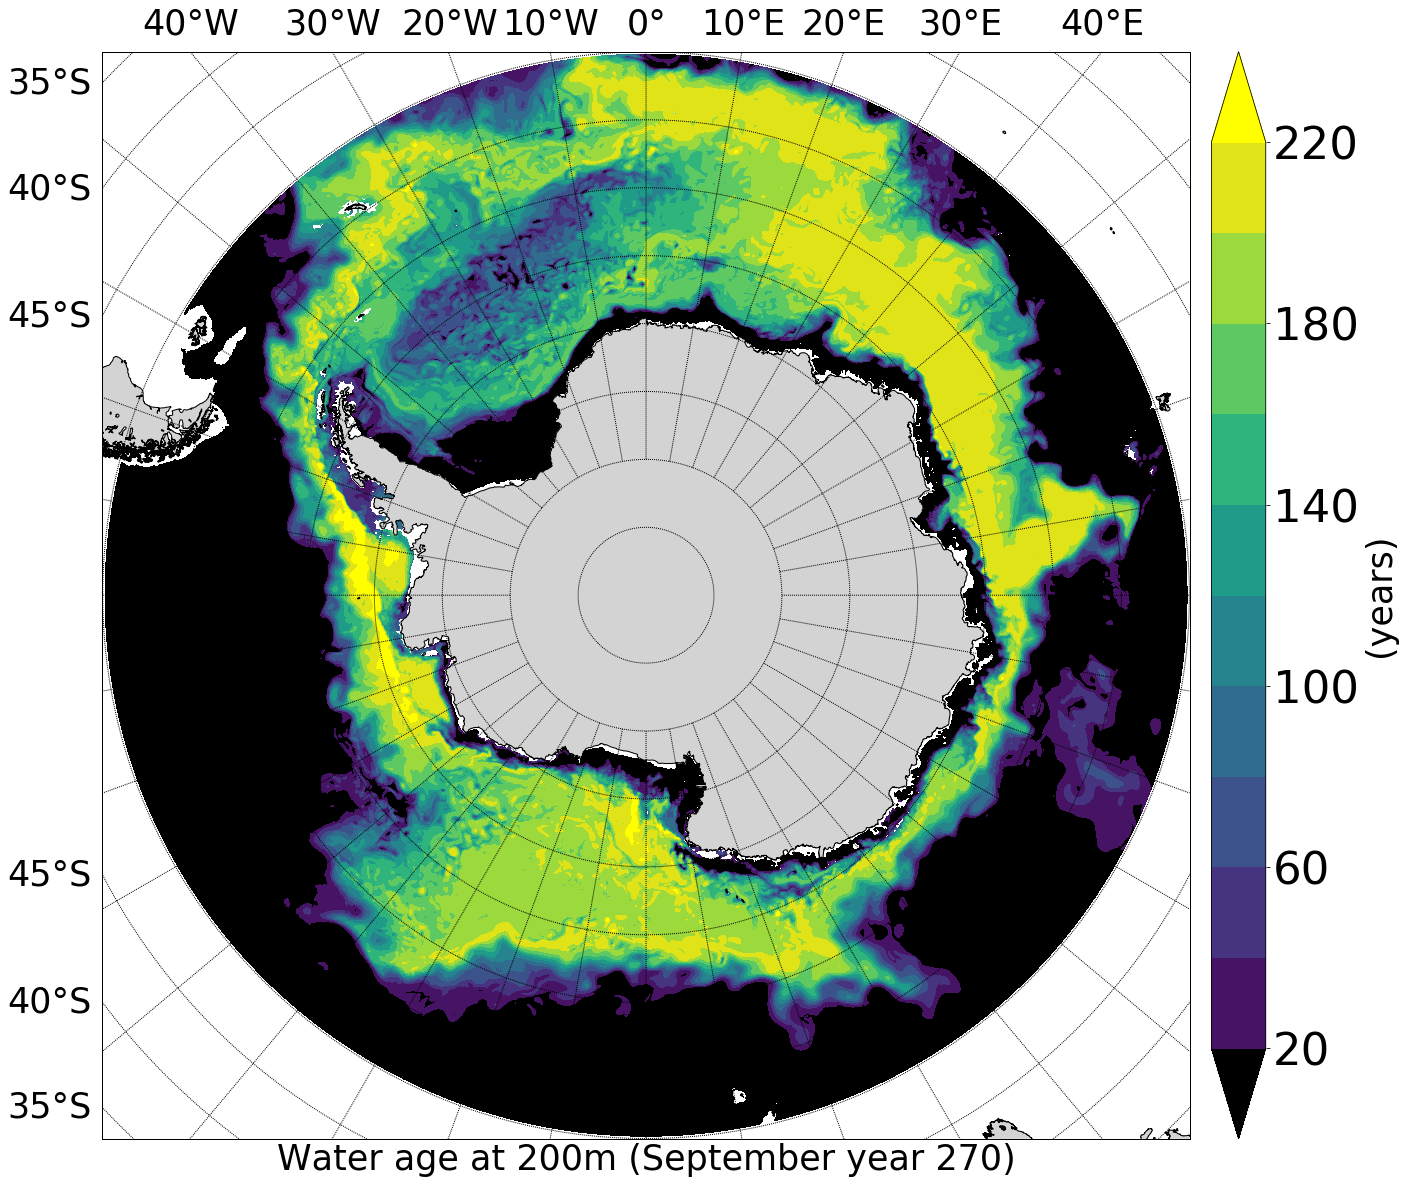

In [2]:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/IAGE/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-09.IAGE.nc')
        plotvar = data.variables['IAGE'][0,:,:]
        plotvar[plotvar == -1] = np.nan
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[:,:]
        latt = latt[:,:]
        plot = plotvar[20,:,:]
        nice_cmap=sns.diverging_palette(245, 15, n=12,as_cmap=True)

        lev_cmap = nice_cmap([0,15,30,50,70,100,110,120]) 
        new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        #nice_levels = [1,10,20,30,40,50,60,70,80,100,120,140]
        nice_levels = [20,40,60,80,100,120,140,160,180,200,220]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

        plt.figure(figsize=(25,20))
        my_font = {'fontname':'Cambria', 'size':'35'}

        map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
        map.drawcoastlines()
        map.fillcontinents(color = 'lightgrey')
        map.drawmapboundary(color='black')
 
        map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
        map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

        x,y=map(lont,latt)


        CP = map.contourf(x,y,plot,spacing = 'uniform',levels = nice_levels,extend='both')

        CP.cmap.set_over('yellow')
        CP.cmap.set_under('black')
        cbar =map.colorbar(CP,extend='both',extendfrac='auto')

        cbar.ax.tick_params(labelsize=45) 
        cbar.set_label('(years)', **my_font)
        plt.xlabel('Water age at 200m (September year 270)',**my_font)
        plt.savefig("agetest.png",bbox_inches='tight')
